# Practice

In [17]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('D:\\Programming\\Python\\py-master\\ML\\13_kmeans\\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Plotting Scatter Plot

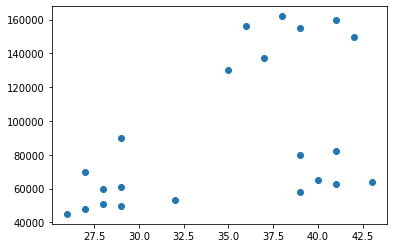

In [19]:
plt.scatter(df['Age'],df['Income($)'])

# Using KMeans Algorithm to group the data

In [20]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [21]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [22]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


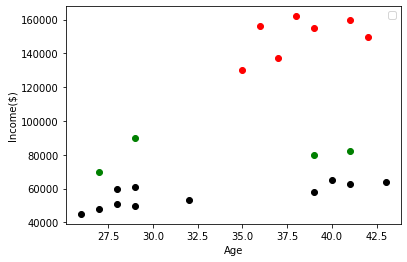

In [23]:
from turtle import color


df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

We have wrong groups, we need to scale the data

# Scaling Data

In [24]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


# Applying KMeans Algorithm again

In [25]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

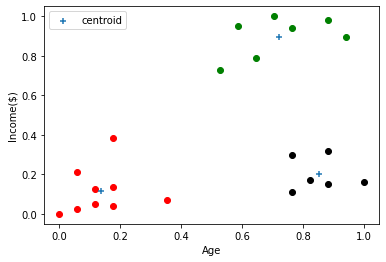

In [26]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [27]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

# Finding Elbow Point

In [30]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.27669362763002786,
 0.22443334487241418,
 0.17851804234260688,
 0.14391444958090924,
 0.11514679223844347]

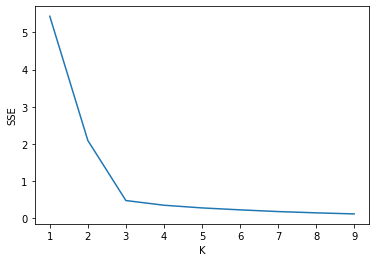

In [31]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range(1,10),sse)

Elbow point is same as the number of clusters we took above